In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

- 일반적으로 거래, 로그데이터의 경우 한 회원 혹은 개체와 관련된 다양한 데이터(레코드)가 있는 경우가 많다.
- 이때 일일히 레코드를 다 붙여주기도하지만, 보통은 해당 개체를 기준으로한 레코드들의 통계량을 붙여주는 경우가 일반적이다.

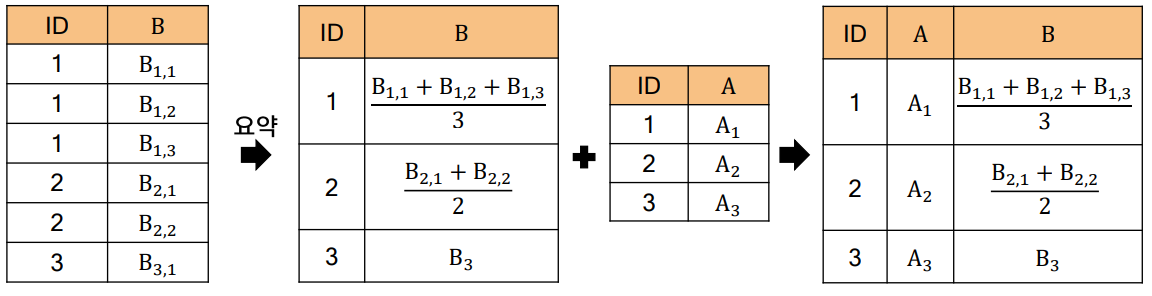

- 사용자 (ID) 가 있고, 그와 관련된 다양한 데이터 (A, B) 들이 있다고 가정
- 머신러닝 상에서 각 세부 데이터에 대한 값이 필요한 경우라면 개별적으로 병합을 한다.
- 하지만 보통은 ID를 기준으로 해당 데이터들을 `요약` 해서 원래의 데이터 A에 붙이는 경우가 일반적이다.

# 관련 문법 : DataFrame.groupby()
---
- 조건부 통계량 (조건에 따른 대상의 통계량) 을 계산하는 함수
- 머신러닝, 통계 분석에서 자주 사용되는 함수

파라미터

---
- by : 조건 변수 (컬럼명, 혹은 리스트로 된 컬럼명들)
- as_index : 조건 변수를 index로 설정할것인지 여부 (default = True)-> output은 Series type이다.
---
e.g)
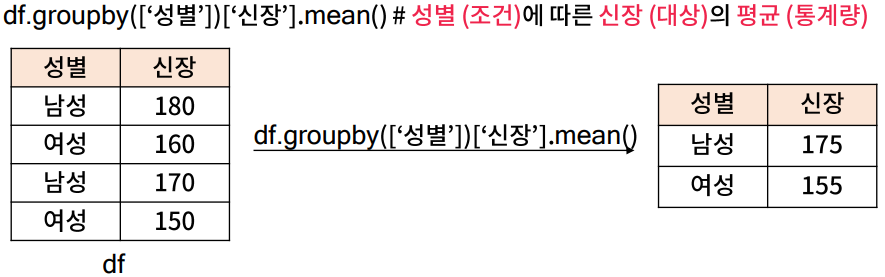

# 데이터 불러오기

In [2]:
# 데이터 불러오기
pop_df = pd.read_csv("고객별_인구통계정보.csv", engine = "python", encoding='cp949') # mother data
purchasing_df = pd.read_csv("고객별_구매금액.csv", engine = 'python', encoding='cp949') # merge하려는 data

In [3]:
pop_df.head()

,고객ID,나이,성별,주소
0,고객1,48,남,A아파트
1,고객2,40,남,B아파트
2,고객3,37,여,C아파트
3,고객4,35,여,A연립주택
4,고객5,42,남,B연립주택


In [4]:
purchasing_df.head()

# 동일 ID를 가진 고객이 여러건 구매를 한 데이터도 있다.

,고객ID,구매금액
0,고객10,45990
1,고객2,29800
2,고객7,31400
3,고객5,35300
4,고객2,41200


# 데이터 요약
---
- groupby 함수에서 as_index 의 default값은 True 인데, 이때 자동으로 결과물은 Series 형태로 return된다.

In [5]:
# 즉, '고객ID'가 인덱스로 사용된 것
purchasing_aggregated_df = purchasing_df.groupby('고객ID')['구매금액'].sum()
purchasing_aggregated_df

고객ID
고객1     2494480
고객10    2644200
고객2     2573880
고객3     2998590
고객4     2875420
고객5     2628430
고객6     2419410
고객7     2709620
고객8     2914460
고객9     2283150
Name: 구매금액, dtype: int64

In [6]:
# 고객ID는 index가 되었기 때문에 고객ID에 대응되는 sum()된 값들만 나온다.
# 고객ID는 return되지 않는다.
purchasing_aggregated_df.iloc[2]

2573880

# 데이터 병합

## 방법1 (merge 활용)

In [7]:
# 데이터 병합 수행
# 좌측 데이터는 고객 ID가 column으로 있지만, 우측 데이터는 index로서 있다.
# 따라서 좌측은 left_on으로 column을 명시, 우측은 right_index로 index를 사용할 것을 명시해서 merge한다.
merged_df = pd.merge(pop_df, purchasing_aggregated_df, left_on = '고객ID', right_index = True)

In [8]:
merged_df.head()

,고객ID,나이,성별,주소,구매금액
0,고객1,48,남,A아파트,2494480
1,고객2,40,남,B아파트,2573880
2,고객3,37,여,C아파트,2998590
3,고객4,35,여,A연립주택,2875420
4,고객5,42,남,B연립주택,2628430


In [9]:
# 병합된 데이터의 컬럼명을 이해하기 쉽도록 변경
merged_df.rename(columns = {'구매금액':'구매금액합계'}, inplace = True)
merged_df

,고객ID,나이,성별,주소,구매금액합계
0,고객1,48,남,A아파트,2494480
1,고객2,40,남,B아파트,2573880
2,고객3,37,여,C아파트,2998590
3,고객4,35,여,A연립주택,2875420
4,고객5,42,남,B연립주택,2628430
5,고객6,44,남,C연립주택,2419410
6,고객7,47,남,A단독주택,2709620
7,고객8,38,여,B단독주택,2914460
8,고객9,33,여,D아파트,2283150
9,고객10,30,남,E아파트,2644200


## 방법 2 (replace 활용) 
---
- 하나의 변수만 추가해도 되는 경우는 replace를 통해 데이터 병합을 할 수 도 있다.
- 추가할 변수가 1개 이상부터는 merge를 통하는 것이 훨씬 효율적이다.

In [10]:
# 하나의 변수를 추가하는 경우에 주로 사용하는 테크닉 = replace를 활용
# purchasing_aggregated_df는 Series 형태이고, 이것을  dict() 시켰으므로 고객ID는 key, sum()된 값들은 value가 되어 replace된다.

pop_df['구매금액합계'] = pop_df['고객ID'].replace(purchasing_aggregated_df.to_dict())
pop_df

,고객ID,나이,성별,주소,구매금액합계
0,고객1,48,남,A아파트,2494480
1,고객2,40,남,B아파트,2573880
2,고객3,37,여,C아파트,2998590
3,고객4,35,여,A연립주택,2875420
4,고객5,42,남,B연립주택,2628430
5,고객6,44,남,C연립주택,2419410
6,고객7,47,남,A단독주택,2709620
7,고객8,38,여,B단독주택,2914460
8,고객9,33,여,D아파트,2283150
9,고객10,30,남,E아파트,2644200
